## DS Workflow

1.EDA 
- analysis 
- find any trends

2. Data Cleaning / Feature Engg
- clean data
- add new features

3. Predictive modelling
- Running algos
- cross validation
- evaluation metrics - accuracy, area under the curve (AUC), rmse

### EDA

In [1]:
import matplotlib
matplotlib.use('nbagg')

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('fivethirtyeight')
import os

In [5]:
os.getcwd()

'C:\\Pandas'

In [6]:
data = pd.read_csv('data/train.csv')

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data['Survived'].value_counts()/len(data['Survived'])

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<IPython.core.display.Javascript object>


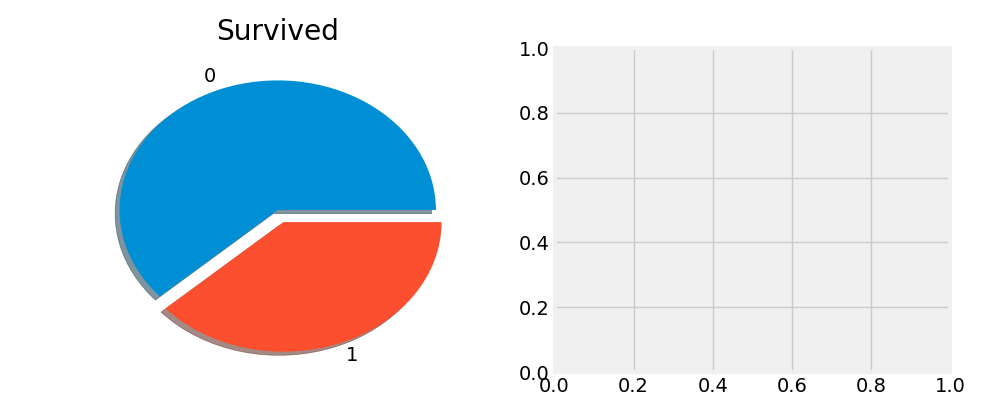

In [22]:
f, ax = plt.subplots(1,2, figsize = (10 ,4))

data['Survived'].value_counts().plot.pie(explode=[0,0.1], ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#ns.countplot('Survived', data=data, ax=ax[1])
#[1].set_title('Survived')

plt.show()

In [23]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [25]:
data['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [26]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<IPython.core.display.Javascript object>


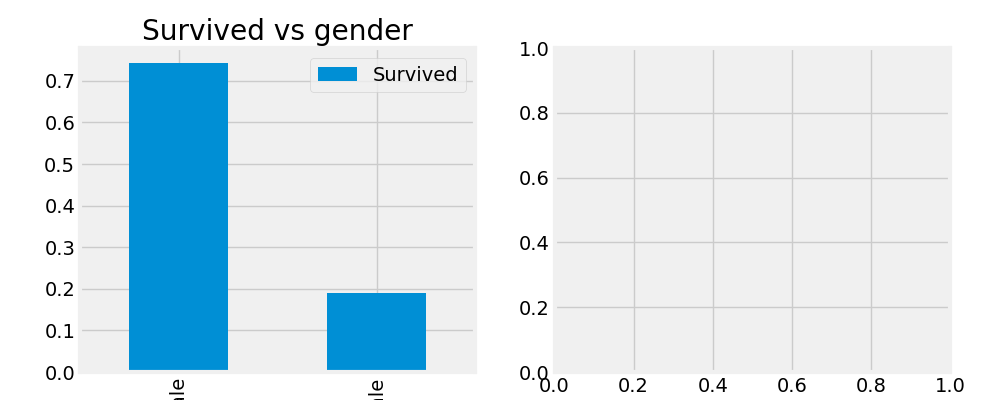

In [29]:
f, ax = plt.subplots(1,2, figsize = (10 ,4))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs gender')
ax[0].set_ylabel('')

#sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
#ax[1].set_title('Survived vs gender')

plt.show()

In [30]:
#Pclass
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [31]:
#Pclass
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<IPython.core.display.Javascript object>


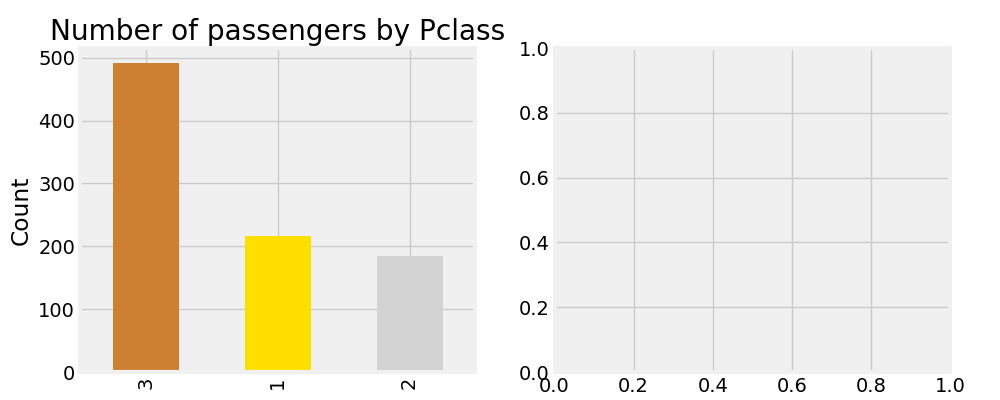

In [36]:
f, ax = plt.subplots(1,2, figsize = (10 ,4))

data['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of passengers by Pclass')
ax[0].set_ylabel('Count')

#sns.countplot('Pclass', hue = 'Survived', data=data, ax=ax[1])
#ax[1].set_title('Survived by Pclass')

plt.show()

In [37]:
print(data['Age'].max())

80.0


In [38]:
print(data['Age'].min())

0.42


In [39]:
print(data['Age'].mean())

29.6991176471


In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,4))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Sex and age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

plt.show()


In [41]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [ ]:
data['Family_Size']=0
data['Family_Size']=data['Parch'] + data['SibSp']
data['Alone'] = 0

data.loc[data.Family_Size==0, 'Alone']=1

f,ax=fig.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Alone vs Survived')

plt.show()

In [44]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
pd.qcut(data['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
5       (7.91, 14.454]
6      (31.0, 512.329]
7       (14.454, 31.0]
8       (7.91, 14.454]
9       (14.454, 31.0]
10      (14.454, 31.0]
11      (14.454, 31.0]
12      (7.91, 14.454]
13     (31.0, 512.329]
14      (-0.001, 7.91]
15      (14.454, 31.0]
16      (14.454, 31.0]
17      (7.91, 14.454]
18      (14.454, 31.0]
19      (-0.001, 7.91]
20      (14.454, 31.0]
21      (7.91, 14.454]
22      (7.91, 14.454]
23     (31.0, 512.329]
24      (14.454, 31.0]
25     (31.0, 512.329]
26      (-0.001, 7.91]
27     (31.0, 512.329]
28      (-0.001, 7.91]
29      (-0.001, 7.91]
            ...       
861     (7.91, 14.454]
862     (14.454, 31.0]
863    (31.0, 512.329]
864     (7.91, 14.454]
865     (7.91, 14.454]
866     (7.91, 14.454]
867    (31.0, 512.329]
868     (7.91, 14.454]
869     (7.91, 14.454]
870     (-0.001, 7.91]
871    (31.0, 512.329]
872     (-0.001, 7.91]
873     (7.

In [45]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_Range'],
      dtype='object')

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Fare_Range     category
dtype: object

In [53]:
train_X = train[train.columns[2:]]
train_X.columns



Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Fare_Range'],
      dtype='object')

In [96]:
col = ['Cabin', 'Embarked' ]
data=data.drop(col,axis=1)

#data = pd.read_csv('data/train.csv')
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

In [58]:
train_Y = pd.DataFrame(train['Survived'])
print(train_Y.head())
print(train_Y.columns)

     Survived
231         0
836         0
639         0
389         1
597         0
Index(['Survived'], dtype='object')


In [100]:
data = data.fillna(-1)

train, test = train_test_split(data, test_size = 0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[2:]]
train_Y = pd.DataFrame(train['Survived'])

test_X = test[test.columns[2:]]
test_Y = pd.DataFrame(test['Survived'])

#test_X = data[data.columns[2:]]
#test_Y = data['Survived']

In [101]:
train_X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')

In [102]:
test_X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')

In [103]:
train_Y.columns

Index(['Survived'], dtype='object')

In [104]:
test_Y.columns

Index(['Survived'], dtype='object')

In [105]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder

lb_Sex = LabelEncoder()
data['Sex'] = lb_Sex.fit_transform(data.Sex)

lb_1 = LabelEncoder()
data['Name'] = lb_1.fit_transform(data.Name)

lb_2 = LabelEncoder()
data['Ticket'] = lb_2.fit_transform(data.Ticket)

#lb = LabelEncoder()
#data['Cabin'] = lb.fit_transform(data.Cabin)

#lb_3 = LabelEncoder()
#data['Embarked'] = lb_3.fit_transform(data.Embarked)


In [88]:
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [109]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)

pred=model.predict(test_X)
print(metrics.accuracy_score(pred, test_Y))

c:\python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.824626865672


In [110]:
print(model.feature_importances_)

[ 0.07737774  0.15140644  0.23385836  0.11906933  0.03581758  0.0353634
  0.19835306  0.14875409]


In [113]:
train_X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], dtype='object')